In [ ]:
# third party imports
import os
import sys
import pickle
import tensorflow as tf
import seaborn as sns

# adding preprocessing directory to path
current_dir = os.path.dirname(os.path.abspath("preprocessing"))
parent_dir = os.path.join(current_dir, '..')
sys.path.append(parent_dir)

# project imports
from preprocessing.common import midi_notes_dataframe, midi_events_dataframe, midi_to_tensor

2025-07-31 13:04:45.580792: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#test_file = r"../data/midi/Beethoven/Symphony op125 n9 2mov ''Choral''.mid"
test_file = r"../data/midi/Bach/01 Menuet.mid"
#test_file = r"../data/midi/Mozart/K626 Requiem 07 Lacrimosa.mid"

events_df = midi_events_dataframe(test_file)
notes_df = midi_notes_dataframe(test_file)

In [4]:
events_df

,raw_events
0,"MetaMessage('track_name', name='untitled', tim..."
1,"MetaMessage('copyright', text='Copyright © 200..."
2,"MetaMessage('text', text='win98\n', time=0)"
3,"MetaMessage('time_signature', numerator=3, den..."
4,"MetaMessage('key_signature', key='F', time=0)"
...,...
1145,control_change channel=1 control=64 value=0 ti...
1146,note_on channel=1 note=53 velocity=0 time=1
1147,polytouch channel=1 note=53 value=0 time=1
1148,"MetaMessage('end_of_track', time=0)"


In [5]:
notes_df

,raw_events,channel,note,velocity,time
0,note_on channel=0 note=72 velocity=100 time=0,0,72,100,0
1,note_on channel=0 note=72 velocity=0 time=119,0,72,0,119
2,note_on channel=0 note=74 velocity=100 time=1,0,74,100,1
3,note_on channel=0 note=74 velocity=0 time=30,0,74,0,30
4,note_on channel=0 note=76 velocity=100 time=0,0,76,100,0
...,...,...,...,...,...
1043,note_on channel=1 note=58 velocity=0 time=119,1,58,0,119
1044,note_on channel=1 note=60 velocity=100 time=1,1,60,100,1
1045,note_on channel=1 note=60 velocity=0 time=119,1,60,0,119
1046,note_on channel=1 note=53 velocity=100 time=0,1,53,100,0


In [6]:
test_tensor = midi_to_tensor(notes_df)
test_tensor.shape

TensorShape([2, 127, 29288])

<Axes: >

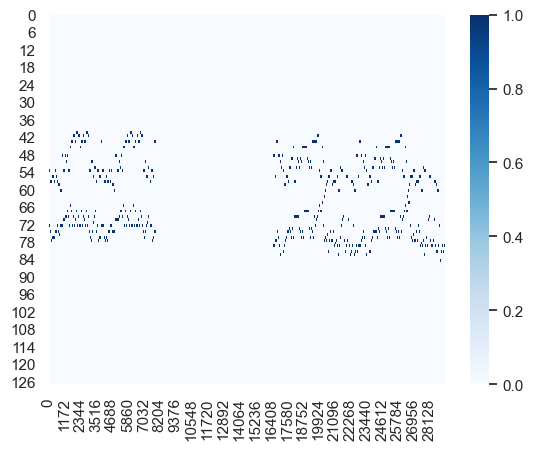

In [7]:
sns.set_theme()
sns.heatmap(tf.reduce_sum(test_tensor, axis=0), cmap="Blues")

In [ ]:
base_path = r"../data/midi/"
sub_dirs = ['Mozart', 'Chopin', 'Beethoven', 'Bach']

for dir in sub_dirs:
    path = f"{base_path}{dir}/"
    files = os.listdir(path)
    for file in files:
        file_path = path + file
        print(file_path)
        
        midi_df = midi_notes_dataframe(file_path)
        t = midi_to_tensor(midi_df)
        dest_path = f"../data/raw_tensors/{dir}/{file[:-4]}"
        try:
            print(dest_path)
            tf.io.write_file(dest_path, t)
            print("success")               
        except Exception as e:
             print(e)
             pass
		

../data/midi/Mozart/Symphony n22 K162 1mov.mid
../data/raw_tensors/Mozart/Symphony n22 K162 1mov
Tensor conversion requested dtype string for Tensor with dtype float64: <tf.Tensor: shape=(7, 127, 64800), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0

KeyboardInterrupt: 

In [3]:
test = "bkbkbkb.mid"

In [4]:
test[:-4]

'bkbkbkb'